# Training

In [1]:
from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import wandb
#from wandb.keras import WandbCallback
import matplotlib.pyplot as plt

2024-05-16 17:28:44.983822: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 17:28:45.030330: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 17:28:46.181890: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
_ = [print(wavfile) for wavfile in os.listdir('./data/down/')+os.listdir('./data/up/') if wavfile.endswith('.wav')]

down0.wav
down1.wav
down10.wav
down11.wav
down12.wav
down2.wav
down3.wav
down4.wav
down5.wav
down7.wav
down8.wav
down9.wav
up0.wav
up1.wav
up10.wav
up2.wav
up3.wav
up4.wav
up5.wav
up6.wav
up7.wav
up8.wav
up9.wav


In [3]:
#wandb.login()

In [4]:
#wandb.init()
#config = wandb.config
#config = set()

#config.max_len = 11
#config.buckets = 20

max_len = 11
buckets = 20
# Define the checkpoint filename
checkpoint_filepath = "best_model.h5"
checkpoint_filepath_lstm = "best_model_lstm.h5"

# Create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor="val_accuracy",  # Monitor validation accuracy
    save_best_only=True,     # Save only the best model
    mode="max"               # Maximize the monitored metric
)

checkpoint_callback_lstm = ModelCheckpoint(
    filepath=checkpoint_filepath_lstm,
    monitor="val_accuracy",  # Monitor validation accuracy
    save_best_only=True,     # Save only the best model
    mode="max"               # Maximize the monitored metric
)

In [5]:
# Save data to array file first
save_data_to_array(max_len=max_len, n_mfcc=buckets)

Saving vectors of label - 'up': 100%|███████████████████████████████████████████████████| 11/11 [00:00<00:00, 25.07it/s]


In [6]:
#max_len=config.max_len
n_mfcc=buckets
DATA_PATH = "./data/"
TEST_PATH = "./test/"
path=DATA_PATH
labels, _, _ = get_labels(path)

In [7]:
# # Feature dimension
channels = 1
#config.epochs = 50
#config.batch_size = 100

epochs = 200
batch_size = 100

labels=["down", "up"]
X_train, X_test, y_train, y_test = get_train_test()

num_classes = len(labels)

X_train = X_train.reshape(X_train.shape[0], buckets, max_len, channels)
X_test = X_test.reshape(X_test.shape[0], buckets, max_len, channels)

In [8]:
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [9]:
X_train = X_train.reshape(X_train.shape[0], buckets, max_len)
X_test = X_test.reshape(X_test.shape[0], buckets, max_len)

model = Sequential()
model.add(Flatten(input_shape=(buckets, max_len)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

2024-05-16 17:28:51.143805: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-16 17:28:51.146258: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
history = model.fit(X_train, \
          y_train_hot, \
          epochs=epochs, \
          validation_data=(X_test, y_test_hot), \
          callbacks=[checkpoint_callback]\
         )

Epoch 1/200
1/1 [==============================] - 1s 713ms/step - loss: 16.7997 - accuracy: 0.3846 - val_loss: 12.7779 - val_accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 40ms/step - loss: 9.9619 - accuracy: 0.3846 - val_loss: 12.1202 - val_accuracy: 0.4000
Epoch 3/200
1/1 [==============================] - 0s 53ms/step - loss: 8.9494 - accuracy: 0.6923 - val_loss: 13.9985 - val_accuracy: 0.4000
Epoch 4/200
1/1 [==============================] - 0s 42ms/step - loss: 10.3381 - accuracy: 0.6923 - val_loss: 14.4817 - val_accuracy: 0.4000
Epoch 5/200
1/1 [==============================] - ETA: 0s - loss: 10.4326 - accuracy: 0.6923

/home/edward/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 41ms/step - loss: 10.4326 - accuracy: 0.6923 - val_loss: 14.0137 - val_accuracy: 0.4000
Epoch 6/200
1/1 [==============================] - 0s 55ms/step - loss: 9.4022 - accuracy: 0.6923 - val_loss: 12.9376 - val_accuracy: 0.4000
Epoch 7/200
1/1 [==============================] - 0s 36ms/step - loss: 7.7406 - accuracy: 0.7692 - val_loss: 11.6890 - val_accuracy: 0.3000
Epoch 8/200
1/1 [==============================] - 0s 40ms/step - loss: 6.2605 - accuracy: 0.6923 - val_loss: 11.4403 - val_accuracy: 0.4000
Epoch 9/200
1/1 [==============================] - 0s 40ms/step - loss: 5.1059 - accuracy: 0.6923 - val_loss: 12.8333 - val_accuracy: 0.5000
Epoch 10/200
1/1 [==============================] - 0s 39ms/step - loss: 5.2771 - accuracy: 0.6154 - val_loss: 13.6154 - val_accuracy: 0.5000
Epoch 11/200
1/1 [==============================] - 0s 34ms/step - loss: 5.6399 - accuracy: 0.5385 - val_loss: 13.4189 - val_accuracy: 0.5000
Epoch 12/200
1/1 [====

In [11]:
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(buckets, max_len), activation="sigmoid"))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.add(Dense(num_classes, activation='softmax'))

In [12]:
model_lstm.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [13]:
#wandb.init()
history_lstm = model_lstm.fit(X_train, \
                              y_train_hot, \
                              epochs=epochs, \
                              validation_data=(X_test, y_test_hot), \
                              callbacks=[checkpoint_callback_lstm]\
                             )

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.7299 - accuracy: 0.4615 - val_loss: 0.6829 - val_accuracy: 0.6000
Epoch 2/200
1/1 [==============================] - 0s 47ms/step - loss: 0.7289 - accuracy: 0.4615 - val_loss: 0.6828 - val_accuracy: 0.6000
Epoch 3/200
1/1 [==============================] - 0s 48ms/step - loss: 0.7279 - accuracy: 0.4615 - val_loss: 0.6827 - val_accuracy: 0.6000
Epoch 4/200
1/1 [==============================] - 0s 54ms/step - loss: 0.7269 - accuracy: 0.4615 - val_loss: 0.6826 - val_accuracy: 0.6000
Epoch 5/200
1/1 [==============================] - 0s 45ms/step - loss: 0.7260 - accuracy: 0.4615 - val_loss: 0.6826 - val_accuracy: 0.6000
Epoch 6/200
1/1 [==============================] - 0s 42ms/step - loss: 0.7250 - accuracy: 0.4615 - val_loss: 0.6825 - val_accuracy: 0.6000
Epoch 7/200
1/1 [==============================] - 0s 50ms/step - loss: 0.7241 - accuracy: 0.4615 - val_loss: 0.6825 - val_accuracy: 0.6000
Epoch 8/200
1/1 [=====

# Save models

In [ ]:
model.save("base.h5")
model_lstm.save("lstm.h5")

# Load models

In [ ]:
model = keras.models.load_model("base.h5")
model_lstm = keras.models.load_model("lstm.h5")

# Load best models

In [14]:
model = keras.models.load_model("best_model.h5")
model_lstm = keras.models.load_model("best_model_lstm.h5")

# Results, graphs, metrics

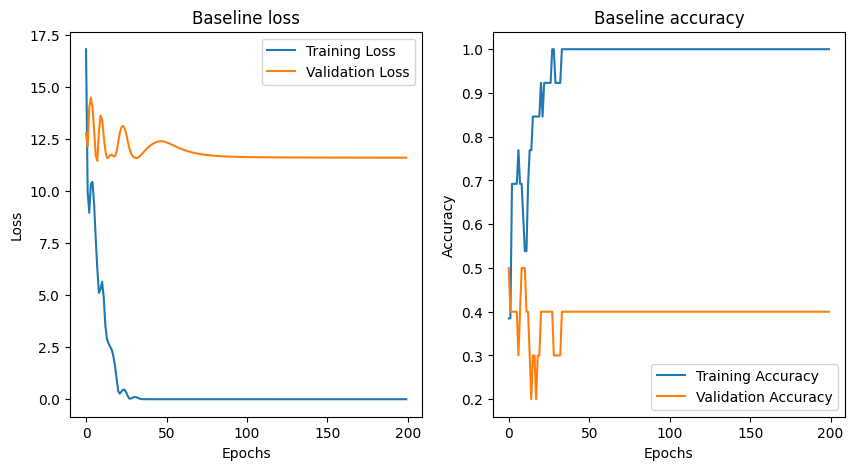

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Baseline loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Baseline accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

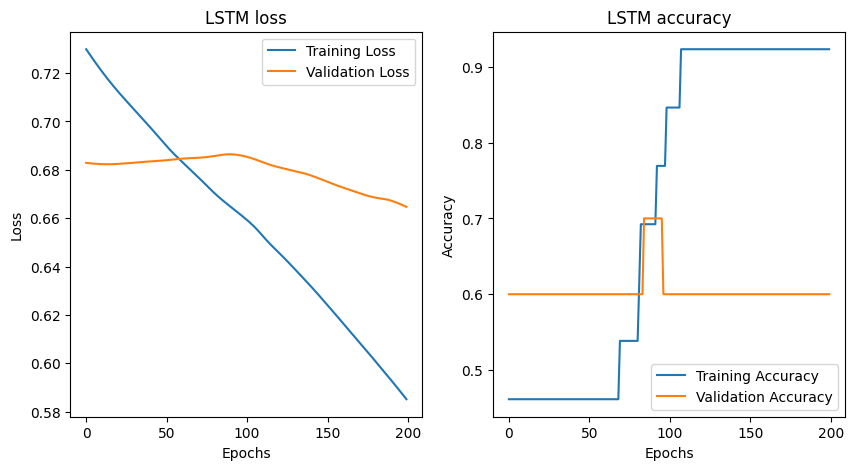

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('LSTM loss')
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('LSTM accuracy')
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

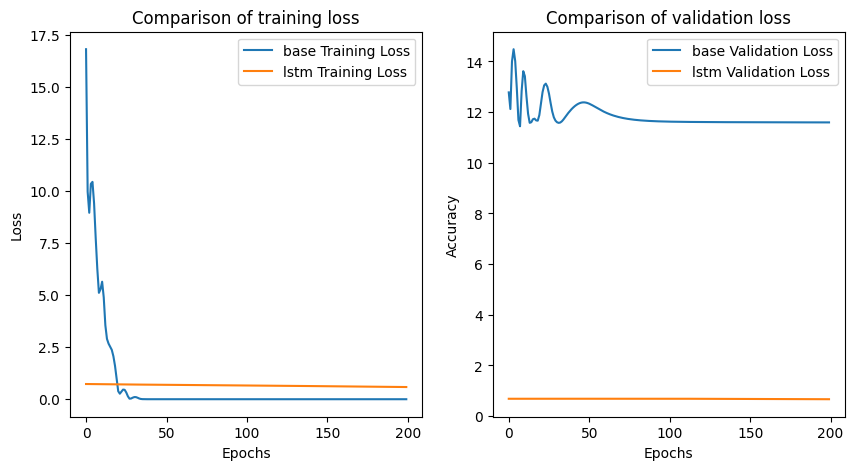

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Comparison of training loss')
plt.plot(history.history['loss'], label='base Training Loss')
plt.plot(history_lstm.history['loss'], label='lstm Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Comparison of validation loss')
plt.plot(history.history['val_loss'], label='base Validation Loss')
plt.plot(history_lstm.history['val_loss'], label='lstm Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

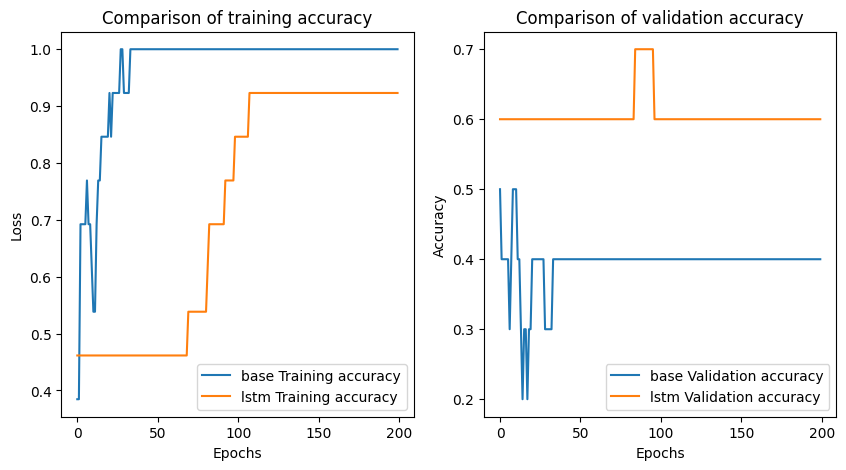

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Comparison of training accuracy')
plt.plot(history.history['accuracy'], label='base Training accuracy')
plt.plot(history_lstm.history['accuracy'], label='lstm Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Comparison of validation accuracy')
plt.plot(history.history['val_accuracy'], label='base Validation accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='lstm Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Prediction

In [19]:
_ = [print('./test/down/'+wavfile) for wavfile in os.listdir('./test/down/') if wavfile.endswith('.wav')]
_ = [print('./test/up/'+wavfile) for wavfile in os.listdir('./test/up/') if wavfile.endswith('.wav')]

./test/down/down0.wav
./test/down/down3.wav
./test/down/down4.wav
./test/down/down5.wav
./test/up/up0.wav
./test/up/up1.wav
./test/up/up2.wav
./test/up/up3.wav


In [22]:
filename = '''

./test/down/down0.wav

'''.strip()
test_sample = wav2mfcc(filename)
base_pred = model.predict(test_sample.reshape(-1, 20,11))[0]
lstm_pred = model_lstm.predict(test_sample.reshape(-1, 20,11))[0]
base_class = 'down' if base_pred[0]>0.5 else 'up'
lstm_class = 'down' if lstm_pred[0]>0.5 else 'up'
print(f'base predicted as: {base_class}')
print(f'lstm predicted as: {lstm_class}')

1/1 [==============================] - 0s 20ms/step
base predicted as: down
lstm predicted as: down
